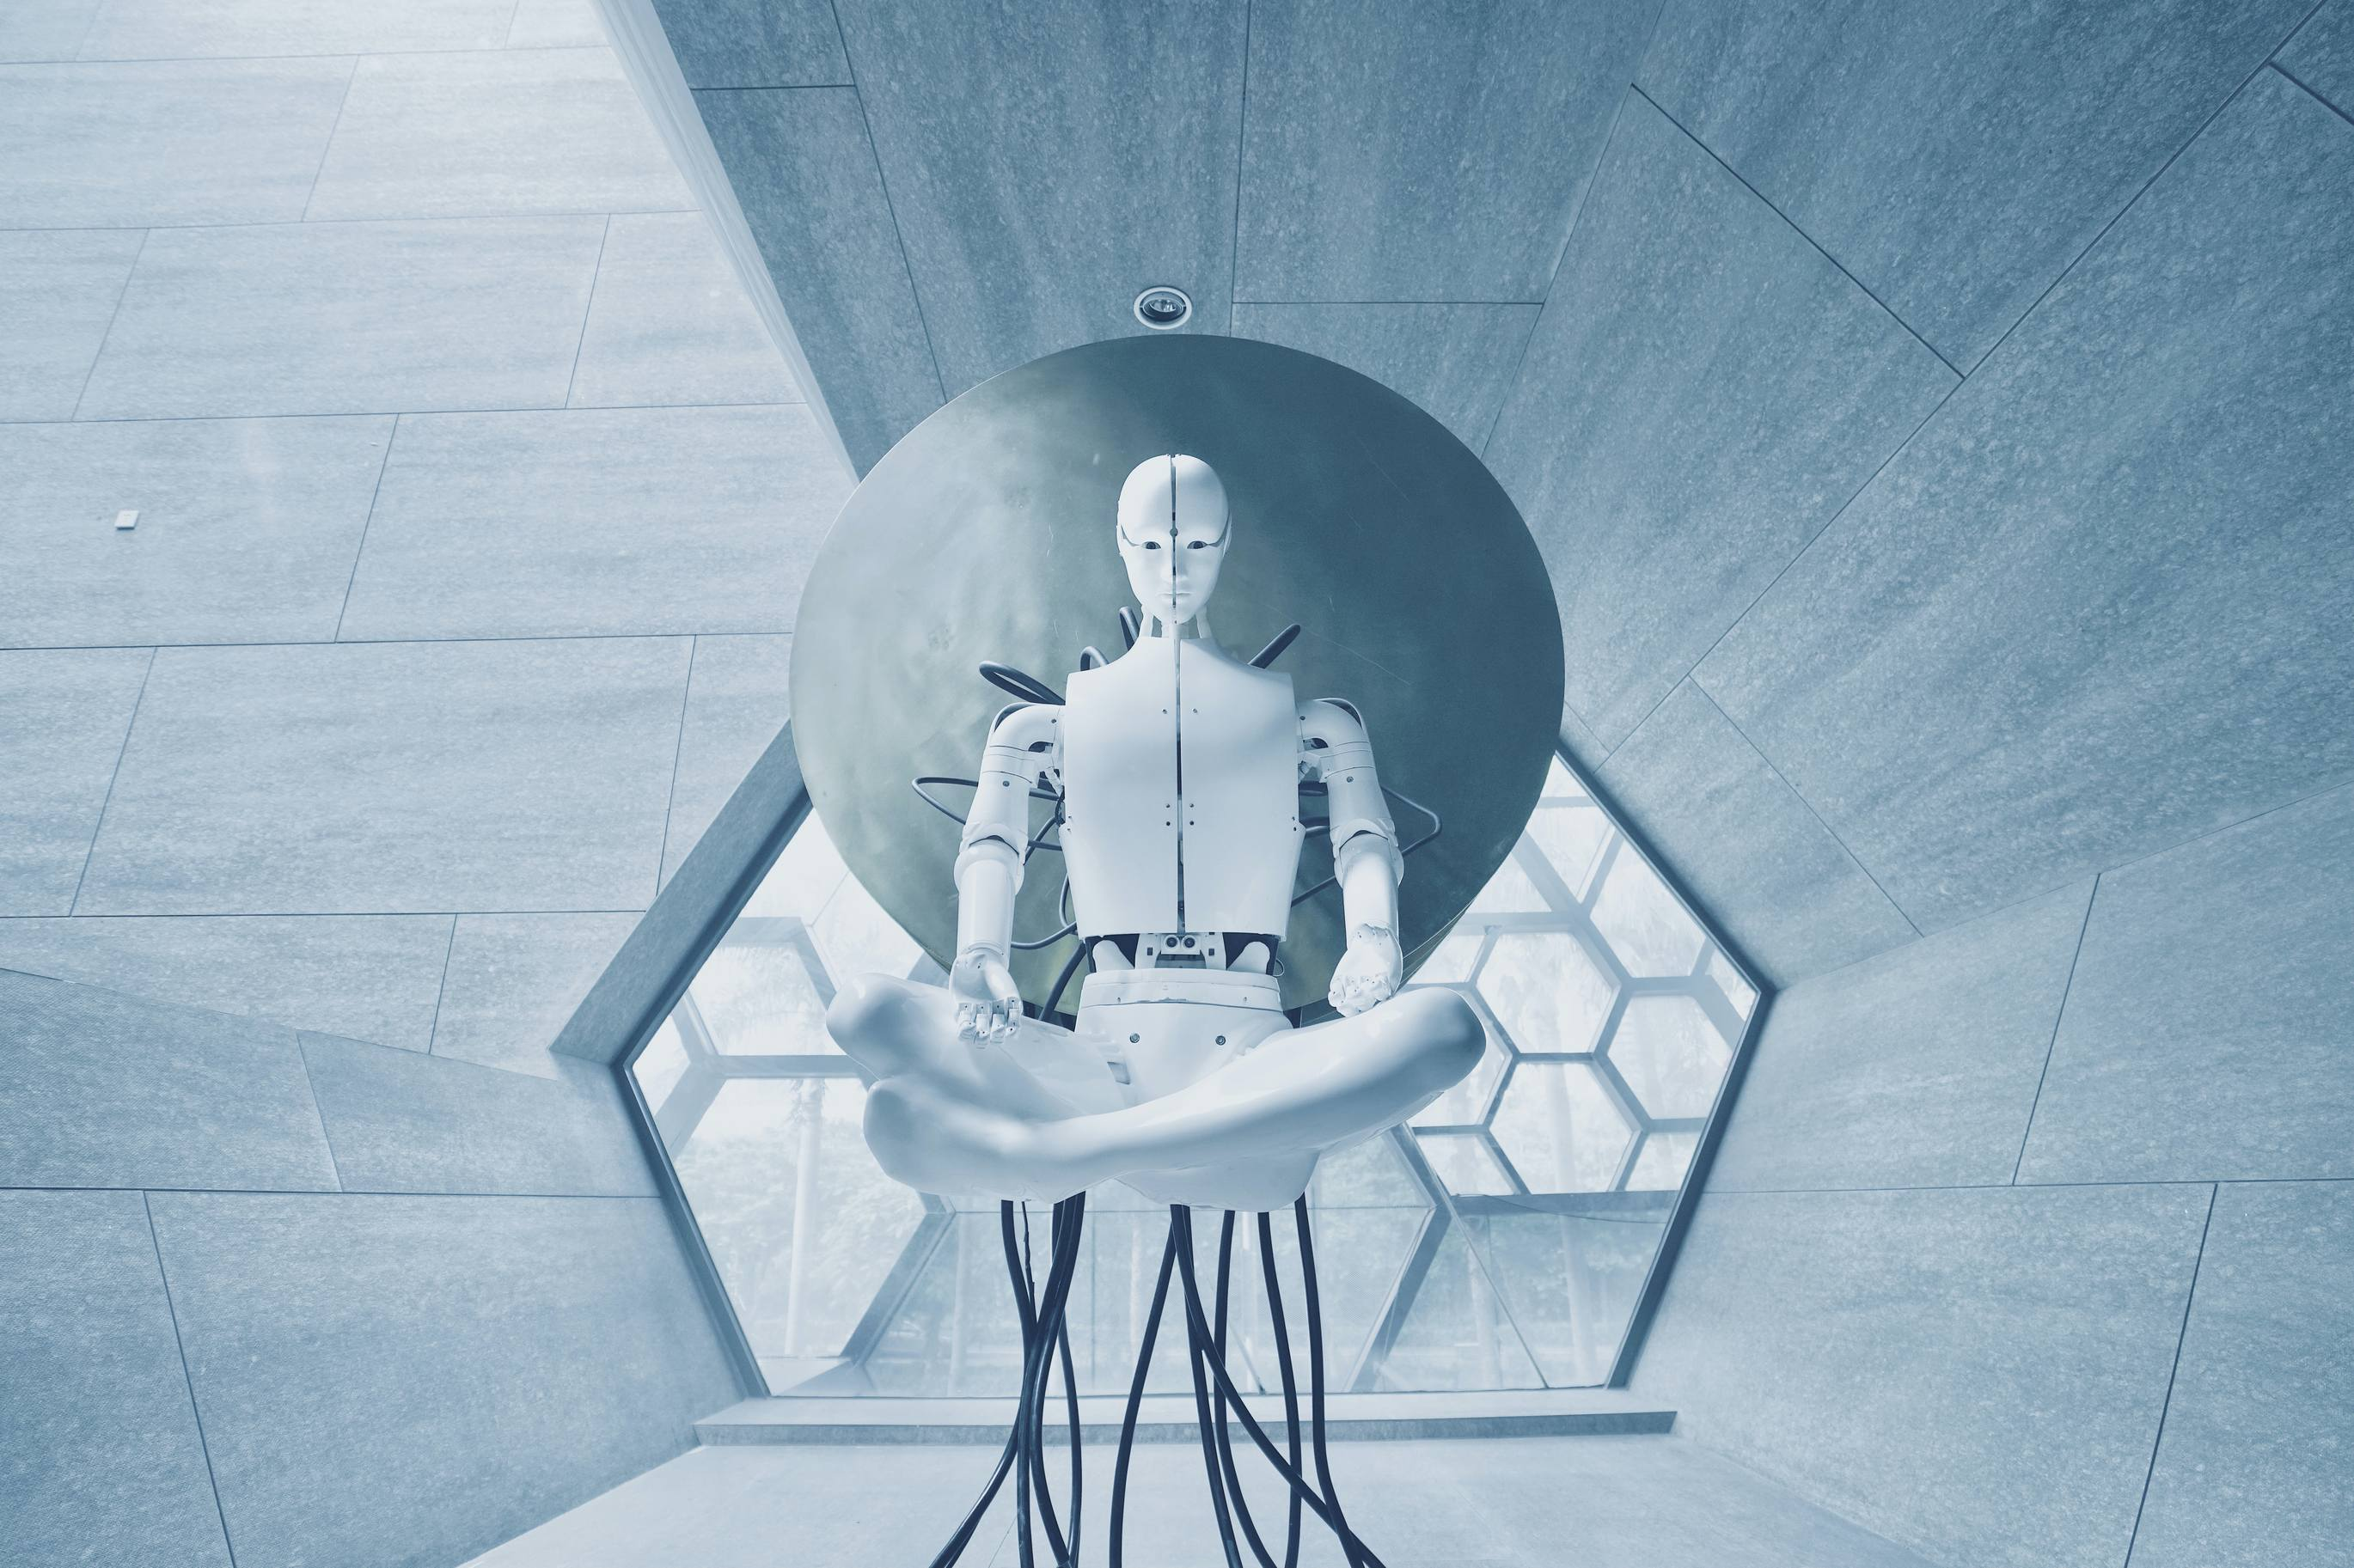

# Exploring  Popular Data Science Questions
***
## Introduction
The aim of this project is to figure out what data science questions are the most popular ones to be learned, for further using this information to create the best data science content for a learning resource (a book / article / video / interactive learning platform like [Dataquest](https://www.dataquest.io)). To investigate this question, we're going to use [Stack Exchange](https://stackexchange.com), a question-and-answer website network, hosting 176 self-moderating sites on a great variety of fields, including data science, mathematics, programming, languages, travelling, music, etc. Some of its most popular sites:
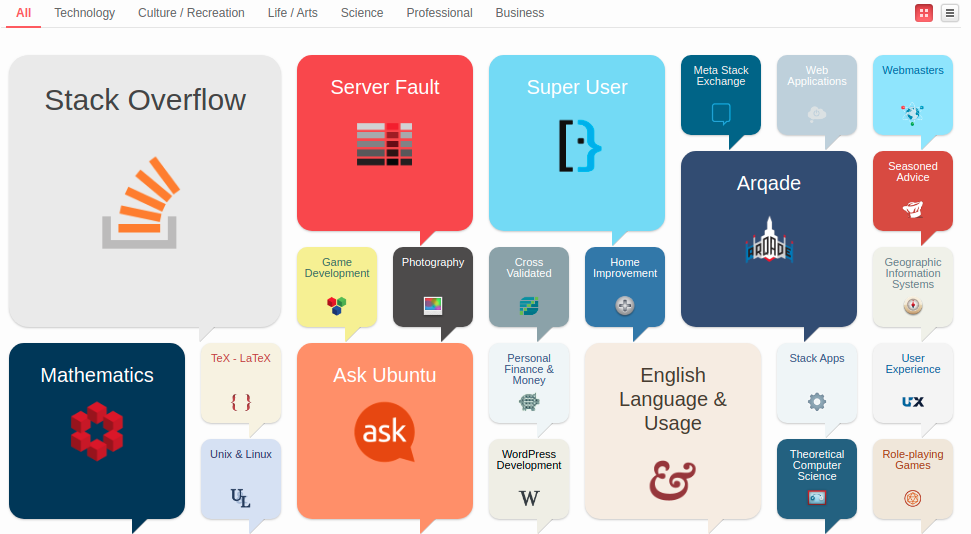

Stack Exchange employs a reputation award system for its questions, answers, and users. Each post is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

Since data science is a multidisciplinary field, there are a few Stack Exchange websites that can be potentially relevant to our goal:
- [Data Science](https://datascience.stackexchange.com)
- [Stack Overflow](https://stackoverflow.com)
- [Cross Validated](https://stats.stackexchange.com)
- [Artificial Intelligence](https://ai.stackexchange.com)
- [Mathematics](https://math.stackexchange.com)

And, if to consider also data engineering:

- [Database Administrators](https://dba.stackexchange.com)
- [Unix & Linux](https://unix.stackexchange.com)
- [Software Engineering](https://softwareengineering.stackexchange.com)

On [this link](https://stackexchange.com/sites?view=list#percentanswered), we'll find a complete list of Stack Exchange websites sorted by % of answered questions. Currently, at the time of this writing (12.01.2021), Data Science Stack Exchange (DSSE) is on the 13th place from the bottom with respect to this metric, having only 67% of answered questions.

The fact that DSSE is a site specialized exactly on data science (contrarily to the others), coupled with it having a high percentage of unanswered questions, makes it an ideal candidate for our investigation.
## DSSE Site Structure 
Let's first look in more detail at the DSSE site structure. The home page has a left-side navigation bar containing the following sections:

- **Home**. Here we see the most recent and the  most "hot" questions. In addition, we can filter the questions by week and month, and also see the so-called "bountied" questions (i.e. those questions answers to which are eligible for a +50 reputation bounty, since a person who asked the question wants to draw more attention to it). 
- **Questions**. In  this section, we see all the questions asked on DSSE. Here we have more options for setting the filter (unanswered, with no accepted answer, most voted, most frequent, bounty ending soon, etc.). For each question, we immediately see the following information:

    - title, 
    - number of answers,
    - number of votes,
    - number of views,
    - if the question was answered,
    - if the question is bountied,
    - the author of the question and his reputation,
    - when the question was asked,
    - the tags related to the question,
    - the beginning of the question.

  If we select and open a particular question, we see some additional information:
  
    - the whole text of the question,
    - the whole text of all the answers (if any),
    - all the users, together with their reputations, that answered the question,
    - when  the question was active last time,
    - when the bounty expires (if applicable),
    - also, we can write our own answer here, after having signed into the site.
- **Tags**. This section shows all the available tags that can be added to a question for better describing it. A definition of each tag is given, together with the number of questions tagged with it, including questions asked today and this week. There are also options to select all tags (by default only the most popular ones are shown) or new tags. Among the most popular tags, we see `machine-learning`, followed with a big gap by `python`, `neural-network`, `deep-learning`, `classification`.
- **Users**. This section contains profiles of all the users. We can immediately see users' photos, nicknames, geographical location, reputation, the most frequent tags they used. Also, we can filter the profiles by reputation or select particular categories of users (new users, voters, editors, moderators), or by the time period of their presence on this site (week, month, quarter, year, all). Opening a particular profile, we get more detailed information and statistics about that user: their short autopresentation (if exists), badges, votes, other Stack Exchange communities where they participate, all the posts created (both questions and answers), all the tags, profile views, last seen, etc.
- **Unanswered**. Here all the unanswered questions are collected. Also, the most unanswered tags are shown, with the number of unanswered questions each. Almost the same tags dominate here, as those that we saw among the most popular tags, with `machine-learning` again opening the list and followed with a big gap by `python`, `deep-learning`, `neural-network`, `keras`.
- **Jobs**. This section redirects us to a page of [StackOverflow](https://stackoverflow.com/jobs), with the current job openings.

At this stage, we can assume that the tags will be very useful in categorizing content.
## Stack Exchange Data Explorer
Stack Exchange provides a public database for each of its websites. To access and explore the public data of each particular site en masse, we have an open source tool available - [Stack Exchange Data Explorer (SEDE)](https://data.stackexchange.com/help). It uses a Microsoft's dialect of SQL called Transact-SQL.

Here's a [link](https://data.stackexchange.com/datascience/query/new) to query and explore Data Science Stack Exchange's database. From the Database Schema,  we can see that the database contains the following 29 tables:
- `Posts`
- `Users`
- `Comments`
- `Badges`
- `CloseAsOffTopicReasonTypes`
- `CloseReasonTypes`
- `FlagTypes`
- `PendingFlags`
- `PostFeedback`
- `PostHistory`
- `PostHistoryTypes`
- `PostLinks`
- `PostNotices`
- `PostNoticeTypes`
- `PostsWithDeleted`
- `PostTags`
- `PostTypes`
- `ReviewRejectionReasons`
- `ReviewTaskResults`
- `ReviewTaskResultTypes`
- `ReviewTasks`
- `ReviewTaskStates`
- `ReviewTaskTypes`
- `SuggestedEdits`
- `SuggestedEditVotes`
- `Tags`
- `TagSynonyms`
- `Votes`
- `VoteTypes`

or, in the form of schema diagram:

![tt](https://i.stack.imgur.com/AyIkW.png)

To see the names and data types of the columns of each table, we can click on the table name in the Database Schema.

Let's explore DSSE's data model and investigate a few of the tables. From the list above, the most promising tables seem to be the following ones (together with their column names, mostly self-explanatory):

- **Posts**: `Id`, `PostTypeId`, `AcceptedAnswerId`, `ParentId`, `CreationDate`, `DeletionDate`, `Score`, `ViewCount`, `Body`, `OwnerUserId`, `OwnerDisplayName`, `LastEditorUserId`, `LastEditorDisplayName`, `LastEditDate`, `LastActivityDate`, `Title`, `Tags`, `AnswerCount`, `CommentCount`, `FavoriteCount`, `ClosedDate`, `CommunityOwnedDate`, `ContentLicense`.
- **Tags**: `Id`, `TagName`, `Count`, `ExcerptPostId`, `WikiPostId`, `IsModeratorOnly`, `IsRequired`.
- **TagSynonyms**: `Id`, `SourceTagName`, `TargetTagName`, `CreationDate`, `OwnerUserId`, `AutoRenameCount`, `LastAutoRename`, `Score`, `ApprovedByUserId`, `ApprovalDate`.

Let's run some queries against these tables to see the data of the most relevant columns. We'll show the results of the first query as a markdown table (for the sake of better readability, since it contains a lot of missing values), and download the results of the others as csv files and read them into pandas.

#### `Posts`

```
SELECT TOP 10 Id, 
              PostTypeId,
              AcceptedAnswerId, 
              Score, 
              ViewCount, 
              Tags, 
              AnswerCount, 
              CommentCount, 
              FavoriteCount
  FROM Posts;
```


Id|PostTypeId|AcceptedAnswerId|Score|ViewCount|Tags|AnswerCount|CommentCount|FavoriteCount
--|----------|----------------|-----|---------|----|-----------|------------|--
45527|1||1|120|`random-forest` `data-cleaning` `encoding` `geospatial`|0|0|
45528|2||0||||1|
45529|2||1||||0|
45530|1||1|151|`deep-learning`|0|0|
45531|2||0||||0|
45532|1||2|86|`classification`|1|3|
45533|1|45537|9|1922|`feature-extraction` `databases`|4|2|1
45534|2||2||||1|
45536|2||1||||5|
45537|2||4||||4|

We can make the following observations here:
- It seems that not only having an answer accepted isn't a frequent thing on this site, but some questions can even have no answer at all (being probably really difficult for many users).
- The questions with an accepted answer tend to attract much more viewers and have a much higher score.
- The columns `Score`, `ViewCount`, `AnswerCount`, `CommentCount`, and  `FavoriteCount` contain information about how popular the post is — the kind of information we're looking for.
- The table contains quite a lot of missing values, but it can be explained by the nature of different entries: those with `PostTypeId` equal to 1 and having tags are questions, and those with `PostTypeId` equal to 2 and without tags - answers. In general, there are 8 different types of posts in the `PostTypeId` column (according to the `PostTypes` table):

id|Name
--|----
1|Question
2|Answer
3|Wiki
4|TagWikiExcerpt
5|TagWiki
6|ModeratorNomination
7|WikiPlaceholder
8|PrivilegeWiki

To figure out which of them are relevant to us, let's check how many of them there are:

```
SELECT PostTypeId, 
       COUNT(*) as NrOfPosts
  FROM posts
 GROUP BY PostTypeId;
 ```
Let's read the results of this query into pandas. Before doing so, we'll import all the libraries necessary for the future analysis:

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno 
import operator
from functools import reduce

pd.read_csv('QueryResults.csv', index_col='PostTypeId')

,NrOfPosts
PostTypeId,
1,26584
2,30267
4,248
5,248
6,11
7,1


Hence, due to their low volume, anything that isn't questions or answers is mostly inconsequential. Even if it happens to be the case that such kind of posts is immensely popular, they would just be outliers and not relevant to us.

Let's move on to the next table of potential interest for us.

#### `Tags`

```
SELECT TOP 5 Id, 
              TagName, 
              Count
  FROM Tags
 ORDER BY Count DESC;
```

In [2]:
pd.read_csv('QueryResults_2.csv')

,Id,TagName,Count
0,2,machine-learning,8571
1,46,python,4985
2,81,neural-network,3566
3,194,deep-learning,3557
4,77,classification,2441


```
SELECT TOP 5 Id, 
              TagName, 
              Count
  FROM Tags
 ORDER BY Count;
```

In [3]:
pd.read_csv('QueryResults_3.csv')

,Id,TagName,Count
0,576,ibm-watson,1
1,898,sap,1
2,969,pdp,1
3,970,shiny,1
4,977,generlized-advantaged-estimation,1


We see again the same extremely popular tags, and also the opposite: the most unpopular ones and having only one question tagged with each.

#### `TagSynonyms`

```
SELECT Id, 
       SourceTagName, 
       TargetTagName, 
       CreationDate, 
       OwnerUserId
  FROM TagSynonyms;
```

In [4]:
pd.read_csv('QueryResults_4.csv')

,Id,SourceTagName,TargetTagName,CreationDate,OwnerUserId
0,1,spark,apache-spark,2015-07-08 11:45:06,21
1,2,software-recommendation,software-recommentation,2015-07-31 08:33:01,21
2,3,pig,apache-pig,2015-08-02 07:36:44,21
3,4,data-visualization,visualization,2015-11-28 08:55:18,21
4,5,parallelism,parallel,2016-01-15 22:03:10,21
5,6,hadoop,apache-hadoop,2016-10-09 08:45:45,21
6,8,neuralnetwork,neural-network,2017-02-22 16:30:33,21
7,9,recommendation,recommender-system,2017-05-19 16:14:12,21
8,10,scikit,scikit-learn,2017-07-20 11:34:00,21
9,11,sklearn,scikit-learn,2017-07-20 11:34:18,21


Few tags have synonyms, introduced by users with special permissions.
## Data Extraction and Exploration
To narrow our research, we'll focus for now on the **recent** posts that represent **questions**. Hence, we'll select from the table `Posts` only the posts with `PostTypeId`=1 and created in 2020 (at the time of writing it, it's early 2021).

```
SELECT Id, 
       CreationDate,
       AcceptedAnswerId, 
       Score, 
       ViewCount, 
       Tags, 
       AnswerCount, 
       CommentCount, 
       FavoriteCount   
  FROM Posts
 WHERE PostTypeId=1
   AND CreationDate LIKE '%2020%';
```

In [5]:
questions_2020 = pd.read_csv('questions_2020.csv')
questions_2020.head()

,Id,CreationDate,AcceptedAnswerId,Score,ViewCount,Tags,AnswerCount,CommentCount,FavoriteCount
0,65740,2020-01-02 16:17:29,65742.0,4,113,<logistic-regression>,1,0,NaN
1,65745,2020-01-02 17:07:11,65748.0,2,78,<neural-network><normalization>,1,0,NaN
2,65746,2020-01-02 17:19:49,65780.0,0,93,<machine-learning><python><multilabel-classifi...,1,1,NaN
3,65747,2020-01-02 17:24:58,65772.0,2,465,<python><computer-vision><opencv>,1,0,NaN
4,65751,2020-01-02 18:22:09,65779.0,3,74,<reinforcement-learning>,1,0,NaN


It seems that the `FavoriteCount` column contains a lot of missing values. Let's check it, as well as the missing values in the whole dataframe:

Number of questions asked in 2020:  7659


MISSING VALUES %:
Id                   0.0
CreationDate         0.0
AcceptedAnswerId    75.0
Score                0.0
ViewCount            0.0
Tags                 0.0
AnswerCount          0.0
CommentCount         0.0
FavoriteCount       88.0
dtype: float64


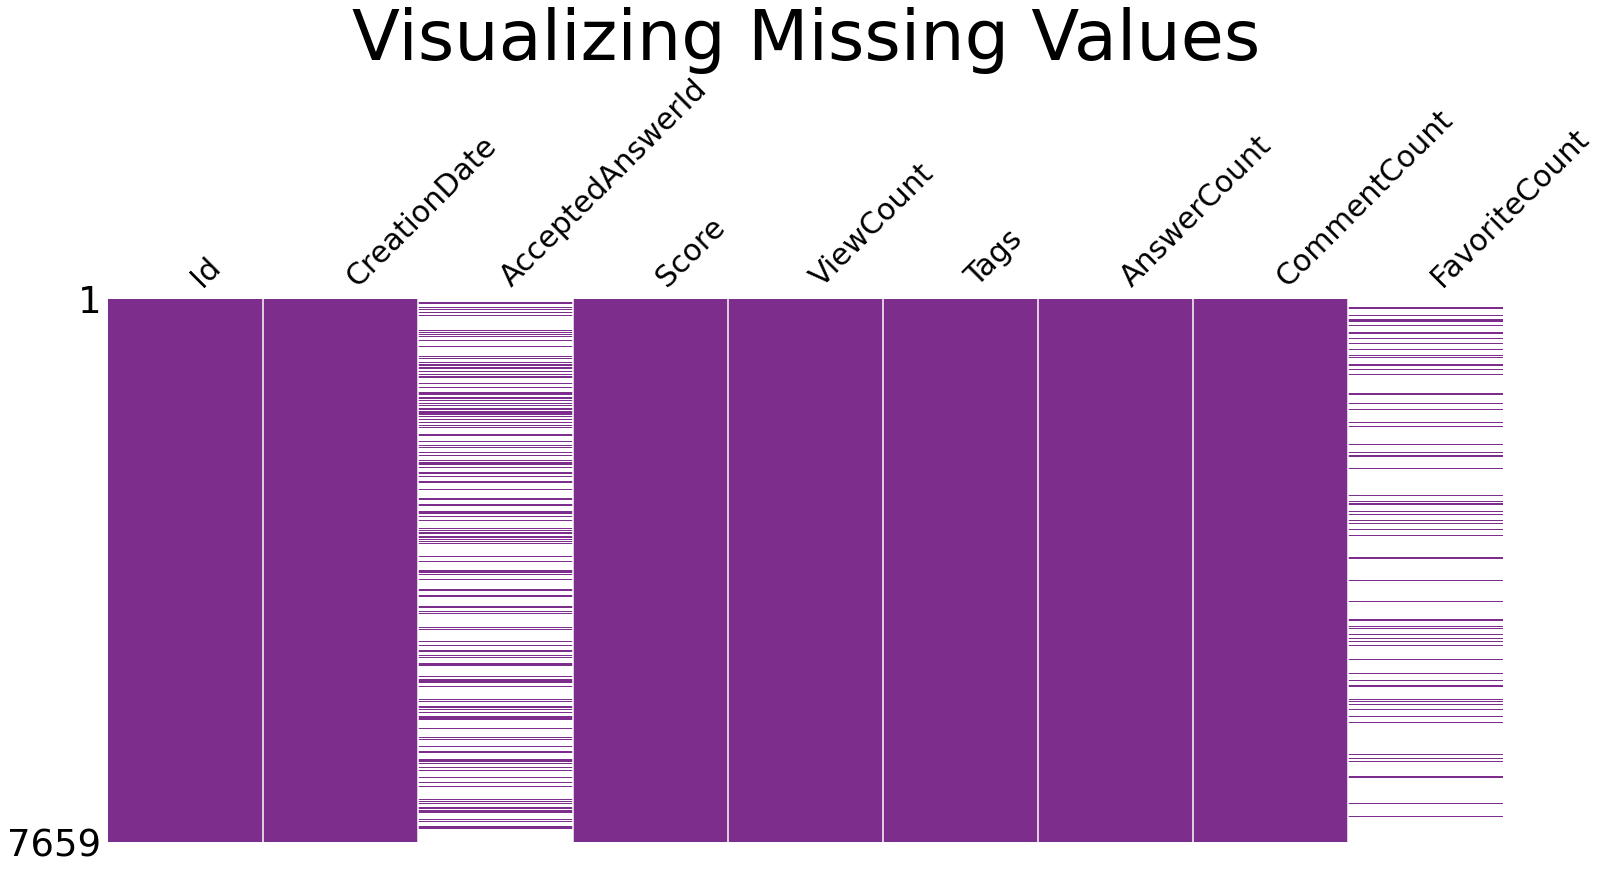

In [6]:
# Checking the number of entries
print('Number of questions asked in 2020: ', len(questions_2020))
print('\n')

# Checking missing values
print(
      f'MISSING VALUES %:\n{round(100 * questions_2020.isnull().sum()/len(questions_2020))}'
      )

# Visualizing missing values by means of the missingno library
msno.matrix(
            questions_2020, 
            fontsize=30, 
            color=(0.494, 0.184, 0.556), 
            sparkline=False,
            inline=False
            ) 
plt.title('Visualizing Missing Values', fontsize=70)
plt.show()

Only 2 columns, `AcceptedAnswerId` and `FavoriteCount`, have missing values (75% and 88% correspondingly). In the first case we don't have any way to fix it, so we'll have to drop this column. In the second case we're going to fill the missing values with 0.

In [7]:
questions_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7659 entries, 0 to 7658
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                7659 non-null   int64  
 1   CreationDate      7659 non-null   object 
 2   AcceptedAnswerId  1909 non-null   float64
 3   Score             7659 non-null   int64  
 4   ViewCount         7659 non-null   int64  
 5   Tags              7659 non-null   object 
 6   AnswerCount       7659 non-null   int64  
 7   CommentCount      7659 non-null   int64  
 8   FavoriteCount     916 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 538.6+ KB


We see that some columns have inadequate data types. We're going to fix it soon, according to the following scheme:

Column|Data type
-|-
CreationDate|datetime
Tags|object
all the others|int

## Data Cleaning
First, we're going to deal with missing values: to drop the `AcceptedAnswerId` column and to fill with 0 the missing values in the `FavoriteCount` column.

In [8]:
# Dropping the column 
questions_2020 = questions_2020.drop(['AcceptedAnswerId'], axis=1)

# Filling the missing values with 0
questions_2020['FavoriteCount'] = questions_2020['FavoriteCount'].fillna(0)

Next, we are going to fix the wrong data types according to the scheme above:

In [9]:
# Converting data types
questions_2020['CreationDate'] = questions_2020['CreationDate'].astype('datetime64')
questions_2020['FavoriteCount'] = questions_2020['FavoriteCount'].astype('int64')

# Double-checking modified data types
questions_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7659 entries, 0 to 7658
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             7659 non-null   int64         
 1   CreationDate   7659 non-null   datetime64[ns]
 2   Score          7659 non-null   int64         
 3   ViewCount      7659 non-null   int64         
 4   Tags           7659 non-null   object        
 5   AnswerCount    7659 non-null   int64         
 6   CommentCount   7659 non-null   int64         
 7   FavoriteCount  7659 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 478.8+ KB


Finally, let's clean the `Tags` column to fit our purposes. Currently, the values in this column are strings that look like this:

In [10]:
questions_2020.loc[2,'Tags']

'<machine-learning><python><multilabel-classification><natural-language-process>'

We're going to transform them into lists of strings, to make them more suitable to use typical string methods.

In [11]:
# Transforming values in the `Tags` column into lists of strings
questions_2020['Tags'] = questions_2020['Tags'].str.replace('><',',')\
                                               .str.replace('<', '')\
                                               .str.replace('>', '')\
                                               .str.split(',')

# Double-checking the results
print(questions_2020.loc[2,'Tags'])
questions_2020.head()

['machine-learning', 'python', 'multilabel-classification', 'natural-language-process']


,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,CommentCount,FavoriteCount
0,65740,2020-01-02 16:17:29,4,113,[logistic-regression],1,0,0
1,65745,2020-01-02 17:07:11,2,78,"[neural-network, normalization]",1,0,0
2,65746,2020-01-02 17:19:49,0,93,"[machine-learning, python, multilabel-classifi...",1,1,0
3,65747,2020-01-02 17:24:58,2,465,"[python, computer-vision, opencv]",1,0,0
4,65751,2020-01-02 18:22:09,3,74,[reinforcement-learning],1,0,0


## Exploring Most Popular Tags
Now that we have our dataframe cleaned, we can start investigating which tags are the most popular ones. As we noticed earlier, the columns potentially helpful for this purpose are `Score`, `ViewCount`, `AnswerCount`, `FavoriteCount`, and, of course, `Tags` (the `CommentCount` column practically represents the number of answers on the answers, hence we can ignore it). 

Let's start by looking at the general statistics of these columns:

In [12]:
questions_2020[['Score', 'ViewCount', 'AnswerCount', 'FavoriteCount']].describe()

,Score,ViewCount,AnswerCount,FavoriteCount
count,7659.000000,7659.000000,7659.000000,7659.000000
mean,0.848805,111.624363,0.764199,0.136441
std,1.440058,455.626956,0.807718,0.482174
min,-4.000000,2.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000
50%,1.000000,32.000000,1.000000,0.000000
75%,1.000000,62.000000,1.000000,0.000000
max,34.000000,17193.000000,10.000000,10.000000


We see that for each column the corresponding ranges are currently the following:
- scores: from -4 to 34,
- number of views: from 2 to 17193,
- number of answers: from 0 to 10,
- number of times a question was favored: from 0 to 10.

Next, we're going to create a dataframe containing each unique tag with the number of times it was used in the questions, sorted in descending order. Additionally, we'll create a dataframe for the TOP10 used tags.

In [13]:
# Creating a dictionary for all the tags
tags_used_dict = {}
for lst in questions_2020['Tags']:
    for tag in lst:
        if not tag in tags_used_dict:
            tags_used_dict[tag] = 0
        tags_used_dict[tag] += 1   
        
# Defining a function for creating a dataframe from a dictionary, 
# sorted in descending order
def create_sorted_df_from_dict(dictionary, new_df_column_name):
    
    # Creating a dataframe from the dictionary
    df = pd.DataFrame.from_dict(dictionary, orient='index').reset_index() 

    # Renaming columns
    df.columns = ['Tag', new_df_column_name]

    # Sorting in descending order
    df = df.sort_values(new_df_column_name, ascending=False).reset_index(drop=True)
    return df, df.head(10)

# Creating 2 dataframes: tags with the corresponding counts and the TOP10 used tags
tags_used, top10_used = create_sorted_df_from_dict(
                                                   dictionary=tags_used_dict,
                                                   new_df_column_name='Count'
                                                   )  

top10_used

,Tag,Count
0,machine-learning,2225
1,python,1435
2,deep-learning,1085
3,neural-network,889
4,keras,696
5,classification,648
6,tensorflow,590
7,nlp,525
8,scikit-learn,510
9,time-series,400


At this point, we can logically assume that the number of times each tag was added to a question (`Count`) should strongly reflect other measures of the tag popularity: scores, number of views, number of answers, and number of times each question with this tag was favored. We're going to check it soon, but first we'll create the dataframes for each of the `questions_2020` columns in interest (`Score`, `ViewCount`, `AnswerCount`, and `FavoriteCount`) and merge them into one dataframe, preserving all the entries. Additionally, we'll create the TOP10 tags dataframes for these columns (let's call them *TOP10 dataframes* from now on, for simplicity).

In [14]:
# Defining a function for finding popular tags by column
def find_popular_tags(column_name, new_df_column_name):

    # Creating a dictionary for all the tags
    tags_dict = {}
    for index, row in questions_2020.iterrows():
        lst = row['Tags']
        popularity_measure = row[column_name]
        for tag in lst:
            if not tag in tags_dict:
                tags_dict[tag] = 0
            tags_dict[tag] += popularity_measure
            
    # Creating a dataframe from the dictionary, sorted in descending order
    tags_df, top10_df = create_sorted_df_from_dict(
                                                   tags_dict, 
                                                   new_df_column_name
                                                   )            
    return tags_df, top10_df

# Creating 2 dataframes for each popularity measures: scores, views, answers, 
# and favorite marks (for all tags and TOP10)
tags_scores, top10_scored = find_popular_tags(
                                              column_name='Score', 
                                              new_df_column_name='Scores'
                                              )
tags_views, top10_viewed = find_popular_tags(
                                             column_name='ViewCount', 
                                             new_df_column_name='Views'
                                             )
tags_answers, top10_answered = find_popular_tags(
                                                 column_name='AnswerCount', 
                                                 new_df_column_name='Answers'
                                                 )
tags_favorite, top10_favorite = find_popular_tags(
                                                  column_name='FavoriteCount', 
                                                  new_df_column_name='Favorite Count'
                                                  )

# Creating a list of dataframes for all tags:
dataframes = [
              tags_used, 
              tags_scores, 
              tags_views, 
              tags_answers, 
              tags_favorite
              ]

# Merging dataframes for all tags:
tags_merged = reduce(lambda left,right: pd.merge(
                                                 left,right,on=['Tag'],
                                                 how='outer', 
                                                 left_index=True, 
                                                 right_index=True
                                                 ), 
                                        dataframes)

tags_merged.head()

,Tag,Count,Scores,Views,Answers,Favorite Count
0,machine-learning,2225,2147,238626,1921,368
1,python,1435,1045,230325,1172,166
2,deep-learning,1085,844,135281,756,135
3,neural-network,889,753,103593,668,122
4,keras,696,629,95071,571,95


Let's now check the correlation between different popularity measures (i.e. the columns of the new merged dataframe):

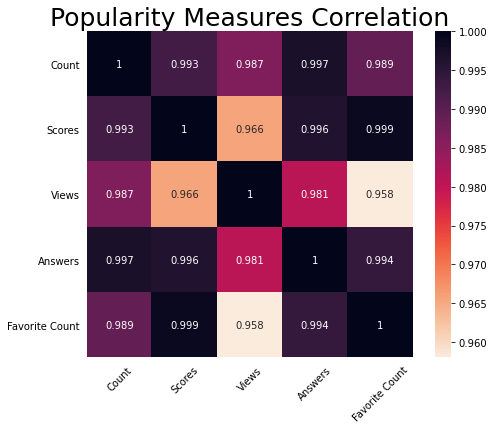

In [15]:
# Creating a correlation heatmap
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(
                 tags_merged.corr(),
                 annot=True,
                 fmt='.3g', 
                 square=True,
                 cmap = sns.cm.rocket_r
                 )
ax.set_title('Popularity Measures Correlation', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.tick_params(bottom=False, left=False)

We can clearly see that our assumption is confirmed: there is a very strong correlation between all the popularity measures of the tags. It means that the topics (reflected by the tag names) that stir the biggest interest among people asking questions usually attracts more views, and gathers more answers, scores, and favorite marks. An especially strong correlation is observed between scores and favorite marks. The least correlated popularity measure among all is the number of views.

Now, let's return to the TOP10 dataframes for each popularity measure created earlier, and make a plot for each.

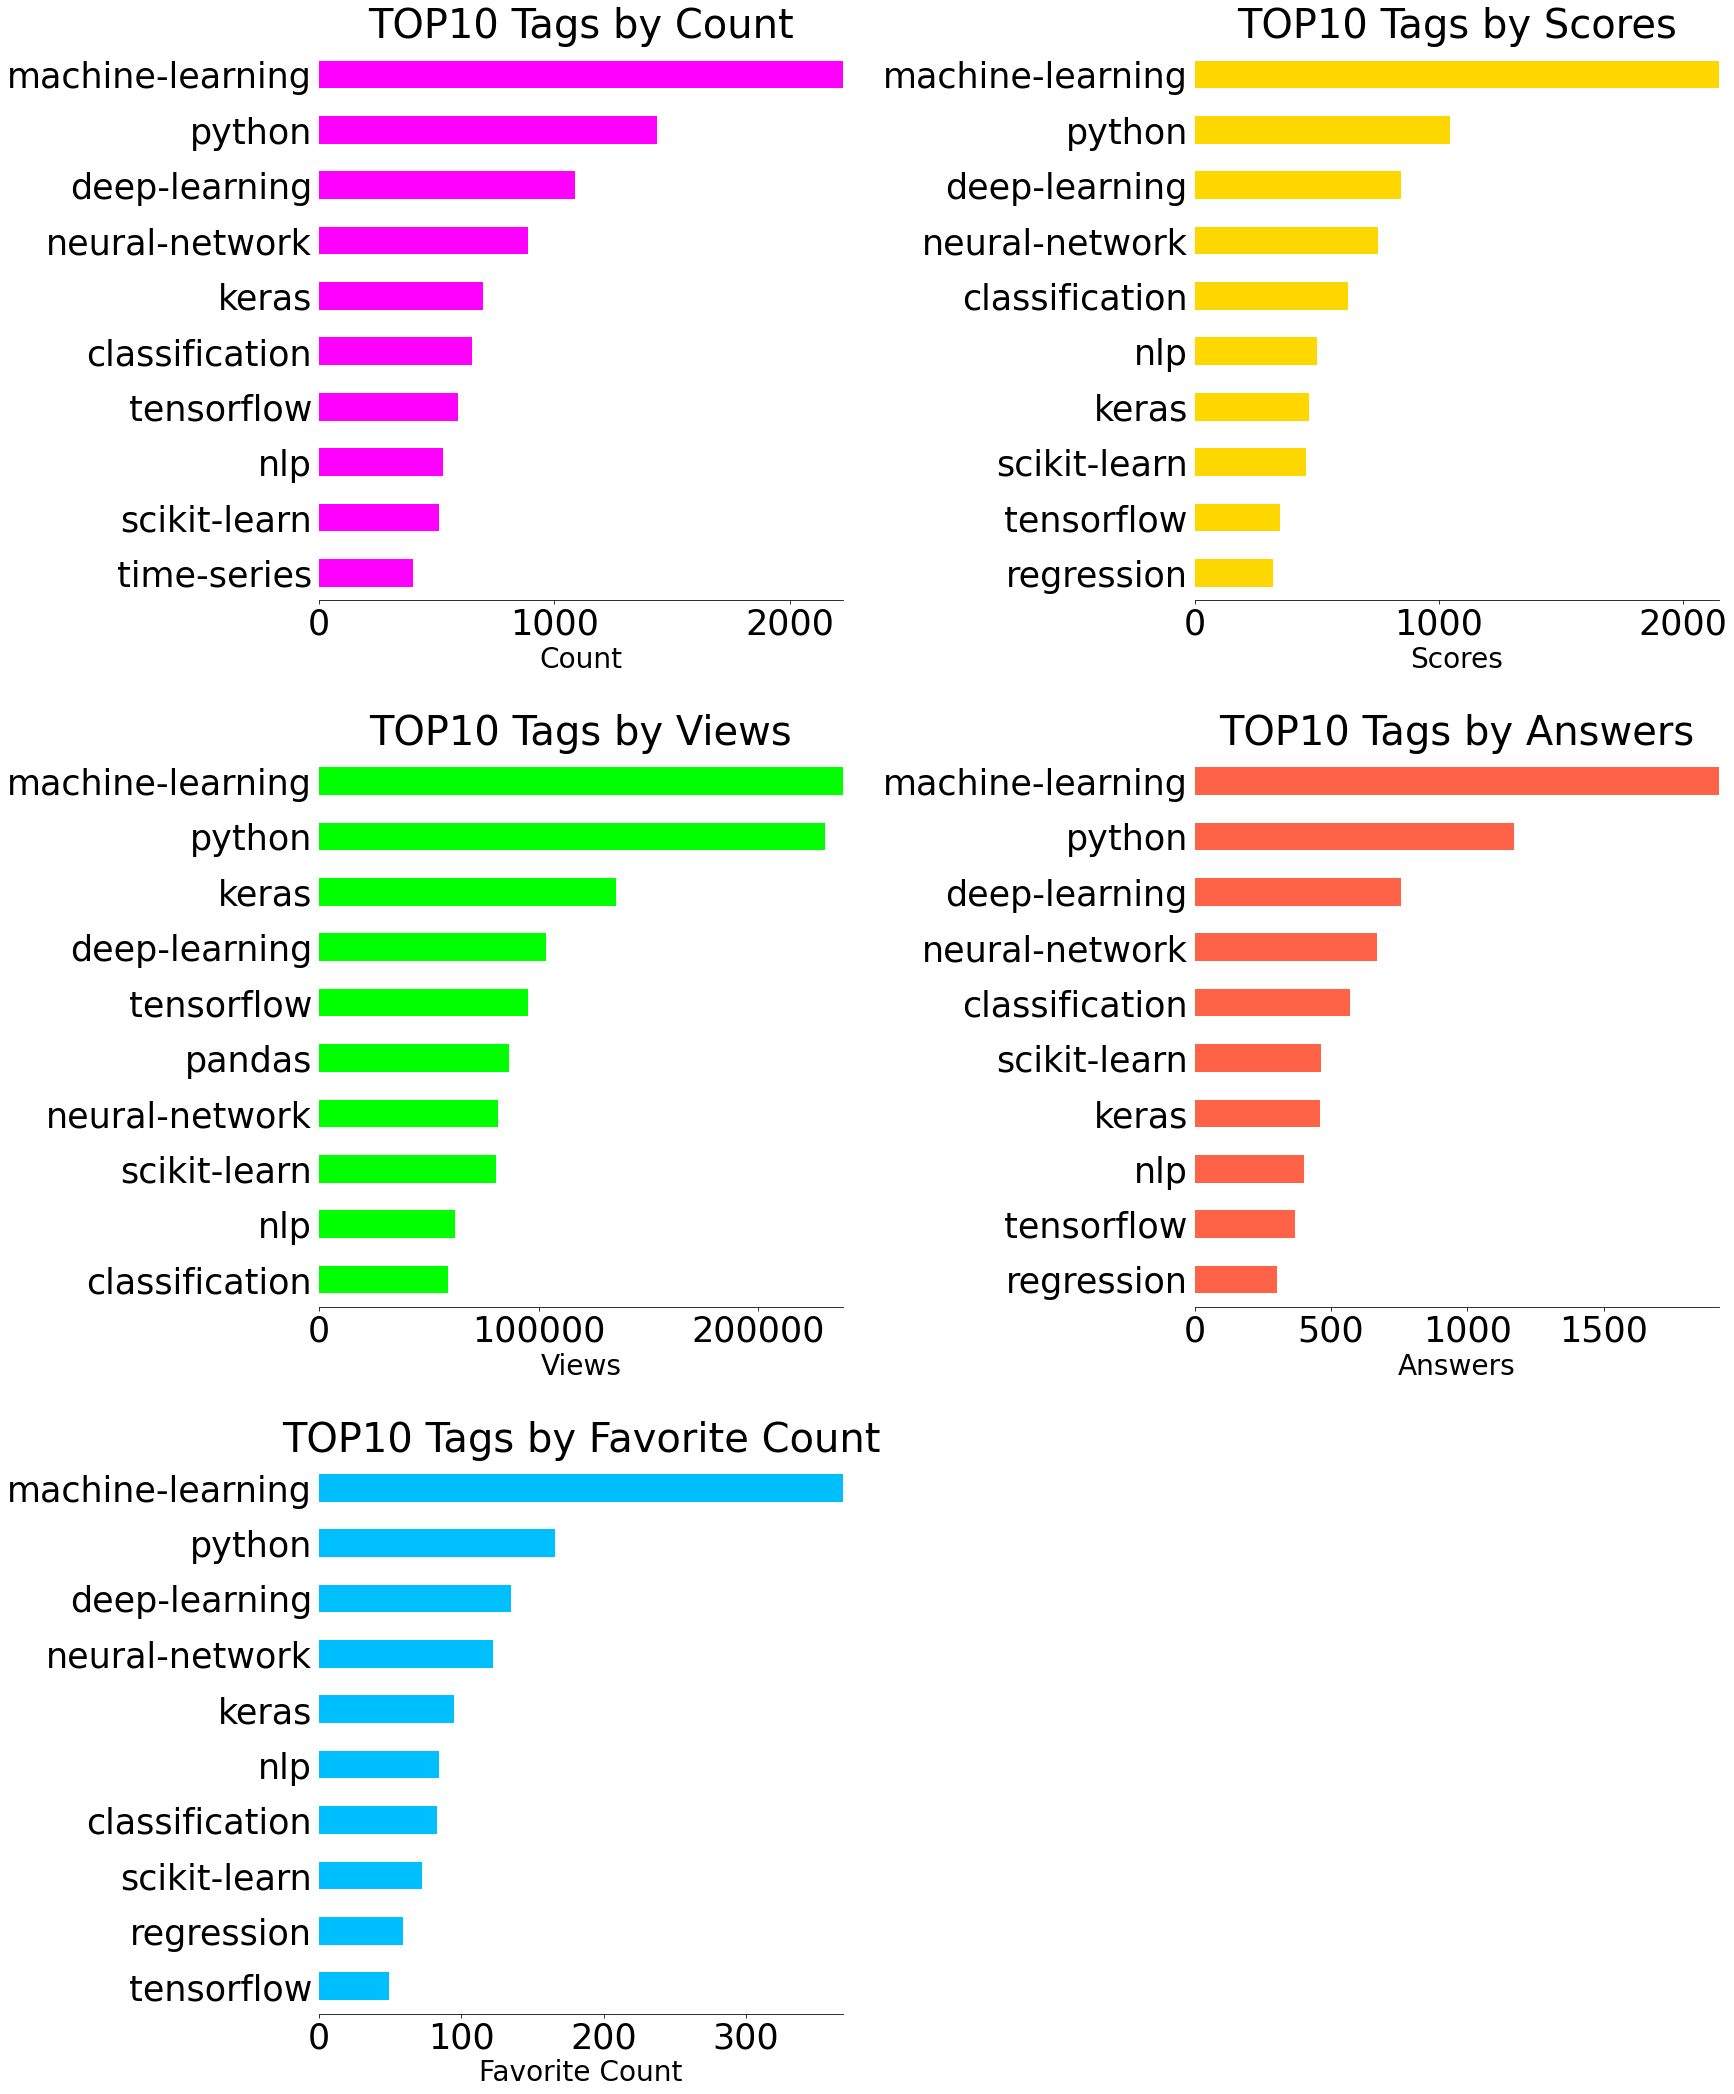

In [16]:
# Creating a list of the TOP10 dataframes
dataframes_top10 = [
                    top10_used, 
                    top10_scored,
                    top10_viewed,                     
                    top10_answered, 
                    top10_favorite
                    ]

# Creating a list of colors, and empty lists for the TOP10 dataframes 
# (with the reset index), columns to be used, plot titles, and x-axis limits
dfs = []
columns = []
titles = []
xlims = []
colors = ['magenta', 'gold', 'lime', 'tomato', 'deepskyblue']

# Filling the empty lists
for df in dataframes_top10:
    dfs.append(df.copy().set_index('Tag', drop=True))
    columns.append(df.columns[1])
    titles.append(f'TOP10 Tags by {df.columns[1]}')
    xlims.append(df.max().tolist()[1])

# Creating horizontal bar plots for all the TOP10 dataframes
fig = plt.figure(figsize=(25, 30))
for i in range(0,5):
    ax = fig.add_subplot(3,2,i+1)   
    dfs[i][columns[i]].sort_values().plot.barh(
                                               color=colors[i],
                                               xlim=(0, xlims[i]),
                                               rot=0
                                               )
    ax.set_title(titles[i], fontsize=40)
    ax.set_ylabel(None)
    ax.set_xlabel(columns[i], fontsize=28)
    ax.tick_params(axis='both', labelsize=35, left = False)
    for j in ['top', 'right', 'left']:
        ax.spines[j].set_visible(False)
    plt.tight_layout(pad=4)      

We can make the following observations here: 
- `machine-learning` and `python` tags are evidently the most popular ones in all the TOP10 dataframes.
- The great majority of tags are presented in all the dataframes.

Based on the second observation, let's find out how many tags occur in **all** of the TOP10 dataframes.

In [17]:
# Creating a merged dataframe for all the TOP10 dataframes
top10_merged = reduce(lambda left,right: pd.merge(
                                                  left,right,on=['Tag'],
                                                  how='inner'), 
                                         dataframes_top10)

print('Number of tags occured in all the TOP10 dataframes: ', 
      len(top10_merged))
top10_merged

Number of tags occured in all the TOP10 dataframes:  9


,Tag,Count,Scores,Views,Answers,Favorite Count
0,machine-learning,2225,2147,238626,1921,368
1,python,1435,1045,230325,1172,166
2,deep-learning,1085,844,103593,756,135
3,neural-network,889,753,81584,668,122
4,keras,696,469,135281,458,95
5,classification,648,629,58519,571,83
6,tensorflow,590,348,95071,367,49
7,nlp,525,500,61993,400,84
8,scikit-learn,510,455,80564,463,72


Hence, in all the TOP10 dataframes, there are 9 out of 10 tags in common, which confirms once again a very strong correlation between the popularity measures. We're going to plot these 9 most popular tags together with the corresponding values of their popularuty measures, but since they all have quite different ranges, it's necessary to normalize them first. 

                Tag     Count    Scores     Views   Answers  Favorite Count
0  machine-learning  1.000000  1.000000  1.000000  1.000000        1.000000
1            python  0.644944  0.486726  0.965213  0.610099        0.451087
2     deep-learning  0.487640  0.393107  0.434123  0.393545        0.366848
3    neural-network  0.399551  0.350722  0.341891  0.347736        0.331522
4             keras  0.312809  0.218444  0.566916  0.238417        0.258152
5    classification  0.291236  0.292967  0.245233  0.297241        0.225543
6        tensorflow  0.265169  0.162087  0.398410  0.191046        0.133152
7               nlp  0.235955  0.232883  0.259791  0.208225        0.228261
8      scikit-learn  0.229213  0.211924  0.337616  0.241020        0.195652


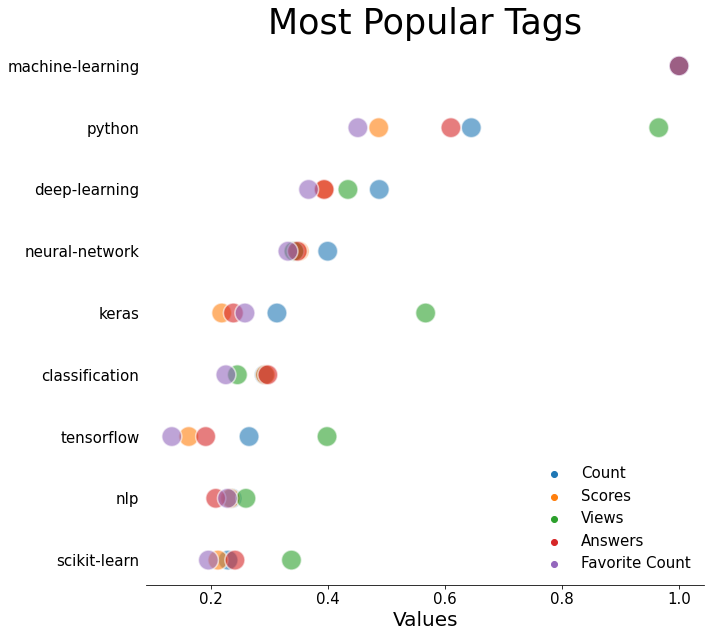

In [18]:
# Normalizing the merged dataframe
top10_merged_normalized = top10_merged.copy()
columns = top10_merged_normalized.columns.tolist()[1:]
for column in columns:
    top10_merged_normalized[column] =\
    top10_merged_normalized[column] / top10_merged_normalized[column].abs().max() 
  
print(top10_merged_normalized)

# Creating a melted dataframe from the merged dataframe for further plotting
top10_melted = pd.melt(
                       top10_merged_normalized, 
                       id_vars=['Tag'], 
                       value_vars=columns
                       )

# Renaming columns
top10_melted.columns = ['Tag', 'PopularityMeasure', 'Value']

# Creating a dot plot for the most popular tags
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(
                     data=top10_melted, 
                     x='Value', 
                     y='Tag', 
                     hue='PopularityMeasure',
                     s=400,
                     alpha=0.6
                     )
ax.set_title('Most Popular Tags', fontsize=35)
ax.set_xlabel('Values', fontsize=20)
ax.set_ylabel(None)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.tick_params(left=False)
ax.legend(loc=4, fontsize=15, frameon=False)
sns.despine(left=True)
plt.show()

We observe several things here:
- The questions with the `machine-learning` tag are by far most popular ones.
- The questions with the `python` tag gather almost as many views as those with `machine-learning`. However, they get much less answers, scores and favorite marks (while still much more than those with the other tags).
- Some other categories (`keras`, `tensorflow`, and `scikit-learn`) seem to be more viewed than answered / scored / marked.

## Engaging Domain Knowledge

All the visualizations so far showed that `machine-learning` is the most popular tag, with a big gap from all the others. This gives us a general trend, however we have to take into account that the sphere of **machine learning** itself is rather large and includes plenty of branches, approaches, and methods. It's not surprising then that so many questions are tagged with this topic, most probably, always (or almost always) in combination with some other tags. The same can be said about the tag on the second place, representing **Python**, the most popular programming language in data science and including quite a lot of things. Since our aim here is to find the best content for a data science learning resource, we should make our research narrower and more focused.

At a closer look, after some googling, we see that all the topics reflected by the 9 most popular tags above are actually all interrelated, and all can be united under a general giant topic: **Machine Learning**.
- **Deep learning** is a new area of *machine learning* research concerned with the technologies used for learning hierarchical representations of data, mainly done with *neural networks*.
- **Neural networks** are composed of programming constructs that mimic the properties of biological neurons. They are widely used in *deep learning* algorithms for solving artificial intelligence problems without the network designer having had a model of a real system.
- **Natural language processing (NLP)** is a subfield of linguistics, computer science, and artificial intelligence (a subset of which is *machine learning*) concerned with the interactions between computers and human language. A new paradigm of NLP, distinct from statistical NLP, is *deep learning* approaches based on *neural networks*. 
- **Scikit-learn** and **TensorFlow** are *machine learning* libraries,  the first one based on *Python*, the second - on *Python* and C++.
- **Keras** is a *deep learning* library that provides a *Python* interface for artificial *neural networks*.
- **Classification** is one of the algorithms of supervised *machine learning*.

From these definitions, we can discern a prospective direction for the content of our data science resource - **deep learning**. The corresponding tag, as well as those most closely related to it (`keras`and `neural-network`), goes at the 3rd place in all the TOP10 lists of the most popular tags, right after `machine-learning` and `python`. As mentioned above, it's also becoming a new concept for NLP. Finally, according to the [Wikipedia article](https://en.wikipedia.org/wiki/Machine_learning#:~:text=Machine%20learning%20(ML)%20is%20the,a%20subset%20of%20artificial%20intelligence) for machine learning:

> As of 2020, deep learning has become the dominant approach for much ongoing work in the field of machine learning.

Hence, being a relatively new, rising area, attracting more and more interest from both learners and data scientists, still quite a large topic, but already much more focused than machine learning in general, **deep learning seems to be a perfect candidate for a data science learning resource content**. 
## Analysing Interest in Deep Learning across Time
Before making final recommendations, we should confirm our findings with additional proof. Since we want to assure that the content we decide to create will be the most useful for as long as possible, we should check if the interest in deep learning is not slowing down over a longer period of time rather than only in 2020. 

To track the interest in this topic across time, we're going to return to the DSSE database and run a query that fetches all of the questions ever asked on DSSE, their dates and tags:
```
SELECT Id, 
       CreationDate, 
       Tags
  FROM posts
 WHERE PostTypeId = 1;
```
The results of this query is read in a dataframe:

In [19]:
questions_all = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])
questions_all.head()

,Id,CreationDate,Tags
0,48282,2019-03-31 02:03:57,<python><data-mining><cross-validation>
1,48286,2019-03-31 05:54:52,<classification><clustering><multilabel-classi...
2,48287,2019-03-31 10:51:35,<python><tensorflow><dataset><annotation>
3,48288,2019-03-31 11:33:53,<apache-hadoop>
4,48289,2019-03-31 11:53:14,<machine-learning><nlp><data-science-model><nltk>


Before starting our analysis, we have to transform the `Tags` column in a similar manner as we did earlier:

In [20]:
# Transforming values in the `Tags` column into lists of strings
questions_all['Tags'] = questions_all['Tags'].str.replace('><',',')\
                                             .str.replace('<', '')\
                                             .str.replace('>', '')\
                                             .str.split(',')

# Double-checking the results
print(questions_all.loc[2,'Tags'])
questions_all.head()

['python', 'tensorflow', 'dataset', 'annotation']


,Id,CreationDate,Tags
0,48282,2019-03-31 02:03:57,"[python, data-mining, cross-validation]"
1,48286,2019-03-31 05:54:52,"[classification, clustering, multilabel-classi..."
2,48287,2019-03-31 10:51:35,"[python, tensorflow, dataset, annotation]"
3,48288,2019-03-31 11:33:53,[apache-hadoop]
4,48289,2019-03-31 11:53:14,"[machine-learning, nlp, data-science-model, nltk]"


Now that we have our dataframe adjusted, let's extract some information from it. In particular, we're interested in finding out what tags, other than `deep-learning`, are strongly related to the deep learning sphere. In other words, we want to know what questions should be classified as deep learning questions. For this purpose, we'll create a dictionary of all the tags used in combination with the `deep-learning` tag and their corresponding frequencies, and then explore them.

In [21]:
# Creating a list of all the tags ever used
all_tags = []
for lst in questions_all['Tags']:
    for item in lst:
        if item not in all_tags:
            all_tags.append(item)

# Creating a list of sets of tags for each question that has `deep-learning`
# as one of the tags
dl_tags = []
for lst in questions_all['Tags']:
    if 'deep-learning' in lst:
        dl_tags.append(lst)

# Creating a dictionary of all the tags used in combination with `deep-learning`
# and their frequencies
dl_tags_dict = {}
for lst in dl_tags:
    for item in lst:
        if item not in dl_tags_dict:
            dl_tags_dict[item]=0
        dl_tags_dict[item] += 1

# Sorting the dictionary
sorted_dl_tags_dict= dict(sorted(
                                 dl_tags_dict.items(), 
                                 reverse=True, 
                                 key=operator.itemgetter(1)
                                 ))
                                 
# Creating a list of all the tags that were used with the `deep-learning` tag,
# but sometimes were used also without it
dl_tags_not_exclusive = []
for lst in questions_all['Tags']:
    for item in list(dl_tags_dict.keys())[1:]: # avoiding checking `deep-learning` itself
         if 'deep-learning' not in lst and item in lst and item not in dl_tags_not_exclusive:
                dl_tags_not_exclusive.append(item)

# Printing the statistics and the dictionary
print('Number of all the questions in the DSSE:',  '\n',
      len(questions_all), '\n', '\n',
      'Number of questions with the `deep-learning` tag:', '\n', 
      len(dl_tags), '\n', '\n',
      'Overall number of all the tags in the DSSE database:', '\n', 
      len(all_tags), '\n', '\n',
      'Number of unique tags associated with `deep-learning`:',  '\n', 
      len(dl_tags_dict), '\n','\n',
      'Number of unique tags associated with `deep-learning`, but sometimes used without:', '\n',
      len(dl_tags_not_exclusive), '\n', '\n',  
      sorted_dl_tags_dict)

Number of all the questions in the DSSE: 
 26853 
 
 Number of questions with the `deep-learning` tag: 
 3544 
 
 Overall number of all the tags in the DSSE database: 
 614 
 
 Number of unique tags associated with `deep-learning`: 
 381 
 
 Number of unique tags associated with `deep-learning`, but sometimes used without: 
 376 
 
 {'deep-learning': 3544, 'machine-learning': 1490, 'neural-network': 1143, 'keras': 665, 'tensorflow': 506, 'cnn': 409, 'python': 408, 'lstm': 240, 'classification': 217, 'nlp': 212, 'computer-vision': 192, 'convnet': 191, 'image-classification': 171, 'rnn': 133, 'time-series': 119, 'convolution': 108, 'pytorch': 95, 'reinforcement-learning': 91, 'dataset': 87, 'loss-function': 85, 'object-detection': 81, 'training': 79, 'autoencoder': 77, 'data-mining': 72, 'gan': 71, 'regression': 69, 'image-recognition': 61, 'natural-language-process': 60, 'predictive-modeling': 57, 'gradient-descent': 55, 'recurrent-neural-net': 55, 'backpropagation': 54, 'word-embedding

From the statistics above, we can make the following observations:
-  13% of all the questions in the DSSE database are tagged with `deep-learning`,
- 62% of all the unique tags were ever used in combination with `deep-learning`,
- **almost all of the tags (99%) associated with `deep-learning` were used at least once without it**. 

The last insight is especially important for us, since it means that there definitely should be some questions not tagged with `deep-learning`, but having some other tags strongly related to the deep learning sphere (for example, representing some specific libraries or methods). Hence, returning to the 1st observation, in reality we should have more (presumably, much more) than 13% of questions related to deep-learning.

Our next step is exactly to find those tags specific only to the deep learning sphere. Since the dictionary of the unique tags associated with the `deep-learning` tag contains quite a big but still manageable amount of items (381), we can decide not to apply correlation techniques, but instead try to deal with these tags manually. Despite this approach is definitely more time-consuming, we can ensure getting more value out of the data. The algorithm is the following:
- Excluding generic and obviously non-specific tags (fortunately for our task, there are quite a lot of them: `kaggle`, `education`, `java`, `parsing`, `career`, etc.). This includes also `machine-learning` and `python`.
- Excluding the tags that can be related both to deep learning and to the "classical" machine learning: `k-nn`, `classifier`, `roc`, `overfitting`, `logistic-regression`, `scikit-learn`, etc. At this step, we'll use our domain knowledge and google information in all ambiguous cases. The idea here is to be rather conservative and keep **only** those tags that are **uniquely related to deep learning**.

Below is the resulting dictionary:

In [22]:
dl_related_tags = {
                   'deep-learning': 3544,
                   'neural-network': 1143,
                   'keras': 665,
                   'cnn': 409,
                   'lstm': 240,
                   'convnet': 191,
                   'rnn': 133,
                   'autoencoder': 77,
                   'gan': 71,
                   'recurrent-neural-net': 55,
                   'backpropagation': 54,
                   'activation-function': 48,
                   'gpu': 42,
                   'deep-network': 39,
                   'dqn': 30,
                   'yolo': 28,
                   'mlp': 24,
                   'attention-mechanism': 23,
                   'dropout': 22,
                   'vgg16': 15,
                   'inception': 14,
                   'mini-batch-gradient-descent': 12,
                   'faster-rcnn': 11,
                   'gru': 10,
                   'caffe': 10,
                   'perceptron': 8,
                   'rbm': 8,
                   'stacked-lstm': 6,
                   'inceptionresnetv2': 6,
                   'ann': 6,
                   'alex-net': 6,
                   'siamese-networks': 5,
                   'neural-style-transfer': 4,
                   'pooling': 4,
                   'graph-neural-network': 4,
                   'vae': 3,
                   'fastai': 3,
                   'cs231n': 3,
                   'pretraining': 2,
                   'tflearn': 2,
                   'gnn': 2,
                   'allennlp': 1,
                   'rmsprop': 1,
                   'keras-rl': 1,
                   'pytorch-geometric': 1,
                   'mxnet': 1,
                  }

print('Number of tags specific to deep learning: ', len(dl_related_tags))

Number of tags specific to deep learning:  46


Since we're going to track the interest in deep learning across time, let's take a look at the `CreationDate` column of our dataframe. In particular, we're interested in the dates of the first and the last (currently) questions on the DSSE.

In [23]:
print('First question asked: ', questions_all['CreationDate'].min(),
      '\n',
      'Last question asked: ', questions_all['CreationDate'].max())

First question asked:  2014-05-13 23:58:30 
 Last question asked:  2021-01-16 21:19:03


Google resources (for example, [this article](https://arxiv.org/pdf/1702.07800.pdf) and many others) show that the era of deep learning started in 2006. As we can see, the first question on the DSSE was asked in 2014, i.e. much later, so we can easily use the infomation from our dataframe starting exactly from the first question, not being worried about any potential discrepancies in the dates. As for the upper limit of our timeframe, we have to decide first on the time periods into which to divide the data. Quarters seem to be a good choice for our purposes, hence, since now it's January 2021, we have to exclude all the questions starting from the 1st of January 2021 inclusive, for the sake of consistency.

In [24]:
# Removing all the entries related to 2021
questions_all = questions_all[questions_all['CreationDate'].dt.year < 2021]

Now, we're going to add to our dataframe 2 additional columns for further plotting: 
- `DL`- showing if a tag is related to deep learning or not,
- `YearQuarter` - representing the year and the quarter when each question was asked.

In [25]:
# Creating a list from the dictionary of the tags associated with deep learning
dl_related_tags_list = list(dl_related_tags.keys())

# Defining a function for labeling questions as related to deep learning or not
def classify_dl(tags):
    for tag in tags:
        if tag in dl_related_tags_list:
            return 1
    return 0

# Defining a function for extracting the year and quarter
def extract_year_quarter(dt):
    quarter = ((dt.month-1) // 3) + 1
    return f'{dt.year}_Q_{quarter}'

# Creating the columns `DL` and `YearQuarter`
questions_all['DL'] = questions_all['Tags'].apply(classify_dl)
questions_all['YearQuarter'] = questions_all['CreationDate'].apply(extract_year_quarter)

Let's create a dataframe summarizing questions by quarter.

In [26]:
# Creating a dataframe summarizing questions by quarter
questions_by_quarter = questions_all.groupby('YearQuarter').agg({'DL': ['sum', 'count']})

# Renaming the columns
questions_by_quarter.columns = ['dl_questions', 'all_questions']

# Adding a column representing % of deep learning related questions
# by quarter
questions_by_quarter['dl_questions_percent'] =\
100 * questions_by_quarter['dl_questions'] / questions_by_quarter['all_questions']

# Resetting the index
questions_by_quarter.reset_index(inplace=True)
questions_by_quarter.sample(5)

,YearQuarter,dl_questions,all_questions,dl_questions_percent
18,2018_Q_4,452,1269,35.618597
10,2016_Q_4,148,519,28.516378
4,2015_Q_2,20,284,7.042254
1,2014_Q_3,9,188,4.787234
14,2017_Q_4,312,888,35.135135


Finally, we can plot the results by quarter:

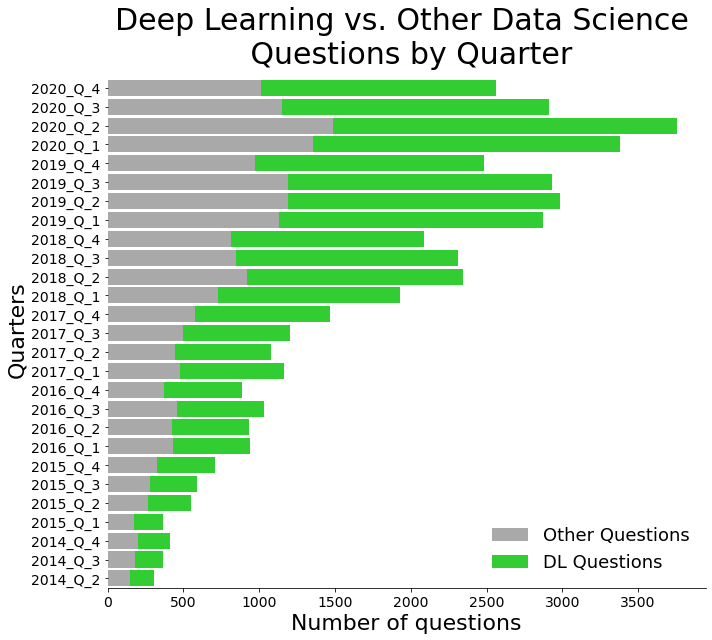

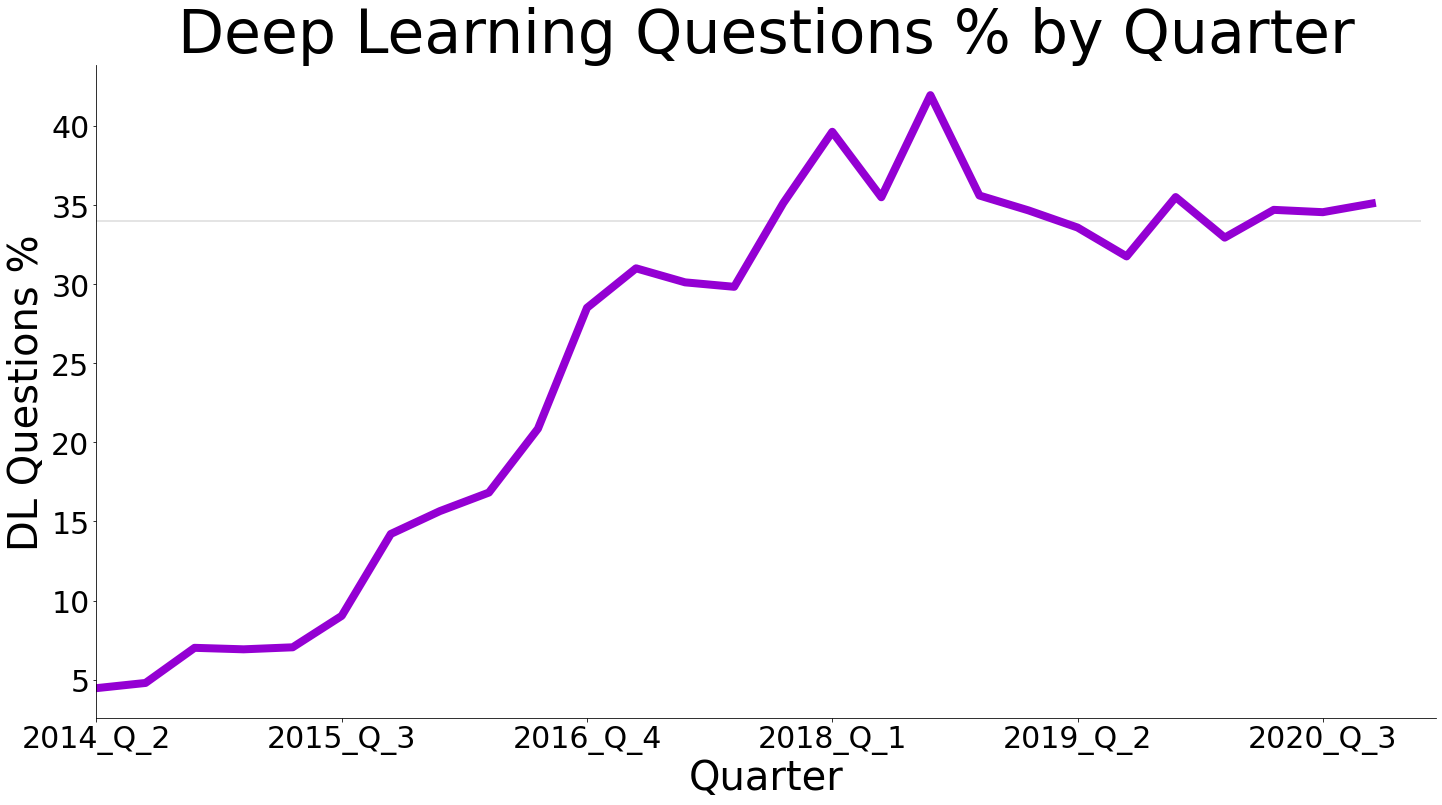

In [27]:
# CREATING A STACKED HORIZONTAL BAR PLOT FOR DL-RELATED AND OTHER QUESTIONS
#--------------------------------------------------------------------------

# Number of bars
N = len(questions_by_quarter)

# Data to plot
other_Q = questions_by_quarter['all_questions']-questions_by_quarter['dl_questions']
dl_Q = questions_by_quarter['all_questions']

# X locations for the groups
ind = np.arange(N)

# Bar width 
width = 0.85

# Plotting the results
fig = plt.figure(figsize=(10,9))
p1 = plt.barh(
              ind, 
              other_Q, 
              width, 
              color = 'darkgray'
              )
p2 = plt.barh(
              ind, 
              dl_Q, 
              width, 
              color = 'limegreen',
              left=other_Q
              )
plt.title('Deep Learning vs. Other Data Science \n Questions by Quarter', fontsize = 30)
plt.xlabel('Number of questions', fontsize=22)
plt.ylabel('Quarters', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(ind, questions_by_quarter['YearQuarter'], fontsize=14)
plt.legend(
           (p1[0], p2[0]), 
           ('Other Questions', 'DL Questions'), 
           frameon=False, 
           fontsize=18, 
           loc=4
           )
plt.ylim(-0.5,27)
plt.tight_layout()
sns.despine(left=True)
plt.show()
print('\n')

#--------------------------------------------------------------------------
# CREATING A LINE PLOT FOR THE PERCENTAGE OF DL-RELATED QUESTIONS BY QUARTER
#--------------------------------------------------------------------------
questions_by_quarter.plot(
                          figsize=(24,12),
                          x='YearQuarter', 
                          y='dl_questions_percent',
                          kind='line', 
                          xlim=0, 
                          linestyle='-', 
                          color='darkviolet', 
                          lw=8,
                          fontsize=30, 
                          legend=False
                          )
plt.xlabel('Quarter', fontsize=40)
plt.ylabel('DL Questions %', fontsize=40)
plt.title('Deep Learning Questions % by Quarter', fontsize=60)
plt.hlines(
           y=34, 
           xmin=0, 
           xmax=N,
           color='gainsboro',
           )
sns.despine()

These 2 graphs give us some interesting insights:
- The number of data science questions in general has been constantly increasing over the whole time of existence of the DSSE (from 2014). A noticeable breakthrough happened in the beginning of 2018 (as a possible way forward, it could be interesting to investigate potential reasons for this growing of interest).
- A curious evident peak in the number of data science questions happened in the 2nd quarter of 2020. We can assume that the reason here was the outbreak of the COVID-19 pandemia and subsequent lockdowns in many countries. Hence, more people became interested in online-learning, getting certified, improving professional skills or even learning a new profession. Also, the opportunity to work online suddenly became very important. Hence, for learning new skills, the preference was given to those ones that could permit working remotedly, and data science is one of such spheres.
- The percentage of deep learning questions was also constantly growing, up until middle of 2018, when it reached a plateau of 34%, which is still continuing, with a slight trend of growing. 
- Earlier in this project, we saw that 13% of all the questions in the DSSE database are tagged with `deep-learning`. The last 2 graphs clearly show that, with taking into account the other tags closely related to deep learning, the overall percentage of deep learning questions is definitely much higher. Let's confirm it:

In [28]:
# Counting the questions containing DL-related tags
dl_counter = 0
for lst in questions_all['Tags']:
    
    # Checking the intersection of `lst` and `dl_related_tags_list`
    if len(list(set(lst) & set(dl_related_tags_list))) > 0:
        dl_counter += 1
  
print(f'Overall percentage of DL-related questions: {round(dl_counter/len(questions_all)*100)}%')

Overall percentage of DL-related questions: 32%


## Conclusion
In this project, we explored the database of Data Science Stack Exchange, with the goal to figure out the most popular data science questions, and, consequently, the best content for a data science learning resource. We focused on the most recent questions (2020) and then, to assure that the content we decide to create will be the most useful for as long as possible, we checked our findings over the whole period of existence of the DSSE (excluding just started 2021). The main approach was to explore the tags and the popularity measures related to the questions tagged with them: number of answers, views, scores, and favorite marks.

As a result, we found out that **deep learning is the most prospective direction for the content of our data science resource**. Being a relatively new, rising area of machine learning, but already representing the dominant approach for much ongoing work in this field, attracting more and more interest from both learners and data scientists, still quite a large topic, but much more focused than machine learning in general, deep learning seems to be a perfect candidate for our purposes.

Some insights and numbers obtained in this project:
- The number of data science questions in general has been constantly increasing over the whole time of existence of the DSSE (from 2014). There was a noticeable breakthrough in the beginning of 2018 and an evident peak in the 2nd quarter of 2020, the latter potentially related to the outbreak of the COVID-19 pandemia, subsequent lockdowns and growing interest in online learning, in particular in learning data science. 
- The percentage of deep learning questions was constantly growing up until middle of 2018, when it reached a plateau of 34%, which is still continuing, with a slight trend of growing. This means that the interest in deep learning is not slowing down over a long period of time.
- The overall percentage of all deep learning related questions on the DSSE is 32%.

### Way forward:
- In addition to analysing DSSE, we can consider leveraging other Stack Exchange sites listed in the introduction. Some of them are directly related to data science (Stack Overflow, Artificial Intelligence), the others to  mathematics and especially to statistics (Cross Validated), as a mathematical field most relevant to data science. 
- It could be interesting to investigate potential reasons for the growing interest in data science in the beginning of 2018.
- Another curious direction to take for investigating the most popular data science questions could be to look in more detail at "hot" and "bountied" questions.